In [1]:
import random, numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(30)

In [2]:

max = 1
min = 0.3
desired = 800
step = float(max - min) / desired
window = 0.5
numbers_1 = [x - (random.random() * window ) + (window / 2.0) for x in numpy.arange(min,max, step)]

'''
numbers_1 = [random.random() for _ in range(800)]
'''

'\nnumbers_1 = [random.random() for _ in range(800)]\n'

In [3]:
numbers_1

[0.2804592176970947,
 0.40627677818013974,
 0.5367315457244365,
 0.2258071230536191,
 0.4484956522251345,
 0.42573651251019545,
 0.35665086868338636,
 0.23533592311266371,
 0.06259439479813939,
 0.3271084949686876,
 0.06200749619916579,
 0.06333900292068623,
 0.43916223221327855,
 0.5250524435643296,
 0.4822994888851912,
 0.14217363426052237,
 0.264222635526866,
 0.10614366757207011,
 0.0796654462818644,
 0.2394130897060021,
 0.2998976088983198,
 0.5345594842083329,
 0.5574949684716096,
 0.1674778565361435,
 0.23501514306738952,
 0.19036912907353293,
 0.28992376598906994,
 0.23667812038052943,
 0.2551385905955582,
 0.12778717475395052,
 0.5203749906515203,
 0.3298997901762053,
 0.4234029741535144,
 0.16420253844327243,
 0.14121150711281494,
 0.45460991610960294,
 0.5413287599595712,
 0.46076318617394846,
 0.42594249767615033,
 0.19930748532435233,
 0.3801368990674551,
 0.21092518895200024,
 0.43627265329997805,
 0.3257537565713285,
 0.4953156574963636,
 0.26668284665330105,
 0.33369756

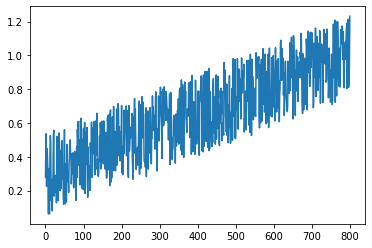

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(numbers_1)
plt.show()


In [5]:
max = 5.0
min = 1
desired = 500
step = float(max - min) / desired
window = 0.5
numbers_2 = [x - (random.random() * window) + (window / 2.0) for x in numpy.arange(min,max, step)]

In [6]:
numbers_2

[1.2089273796346869,
 0.9888090618778007,
 0.8269498878865624,
 0.9263073286311913,
 1.118741146043892,
 1.1555309846450519,
 1.0392425322759156,
 1.0608324108271106,
 1.2640297796542905,
 0.9958143539994422,
 1.2978561958425776,
 0.8743715927700968,
 1.0708306411493258,
 1.2467236865692355,
 1.0580745992371061,
 1.0835380697123922,
 1.2824538629717317,
 0.9313220143581002,
 1.05366773924662,
 1.3089235384727216,
 1.1265418207980389,
 1.0589622757136399,
 1.409363299973268,
 1.4261116718203126,
 0.9570956987617643,
 1.2717005340732812,
 1.415911600253323,
 1.1950275557616077,
 1.399690430800268,
 0.9847822339286164,
 1.038644918594813,
 1.4403976667229772,
 1.4135786287070187,
 1.2089061123448062,
 1.094158118888991,
 1.1046922883689922,
 1.0937542559441131,
 1.228778542394847,
 1.4877646335938688,
 1.185341678990277,
 1.5174954609923546,
 1.2360988734106657,
 1.1967480978224994,
 1.4001643909577848,
 1.4439018925017315,
 1.3466391947837681,
 1.2928270580403374,
 1.4660484419452613,
 1

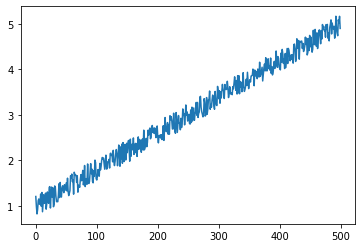

In [7]:
plt.plot(numbers_2)
plt.show()

In [8]:
vib = np.concatenate((numbers_1, numbers_2), axis = 0)

In [9]:
vib.shape

(1300,)

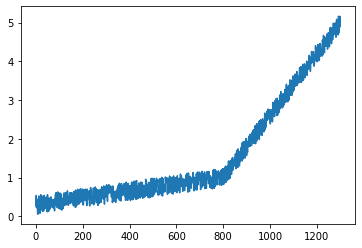

In [10]:
plt.plot(vib)
plt.show()

In [11]:
dataset = pd.DataFrame({'vib': vib[:]})

In [12]:
dataset

,vib
0,0.280459
1,0.406277
2,0.536732
3,0.225807
4,0.448496
...,...
1295,4.737120
1296,5.086697
1297,5.017660
1298,5.163117


In [13]:
dataset.shape

(1300, 1)

In [14]:
print(dataset.loc[0][0])

0.2804592176970947


In [15]:
n = len(dataset)

In [16]:
sum_vib = 0

sum_kurt_m = []
sum_kurt_m_2 =[]

kurtosis = []


for i in range(1,n+1):
    sum_vib = sum_vib + dataset.loc[i-1][0]
    mean = sum_vib / i
    
    kurt_m = pow((dataset.loc[i-1][0] - mean), 4)
    sum_kurt_m.append(kurt_m)
    kurt_nume = np.cumsum(sum_kurt_m)/i
    #print(kurt_nume[i-1])
    
    kurt_m_2 = pow((dataset.loc[i-1][0] - mean), 2)
    sum_kurt_m_2.append(kurt_m_2)
    kurt_deno = pow(np.cumsum(sum_kurt_m_2)/i,2)
    #print(kurt_deno[i-1])
    
    kurtosis_i = kurt_nume[i-1] / kurt_deno[i-1]
    kurtosis.append(kurtosis_i)
    #print(kurtosis)

/home/seungmoo/env-ysm/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [17]:
kurtosis = np.array(kurtosis[1:])
kurtosis

array([2.        , 2.06790851, 1.66269769, ..., 3.91098445, 3.9100927 ,
       3.9049272 ])

In [18]:
kurtosis[0:]

array([2.        , 2.06790851, 1.66269769, ..., 3.91098445, 3.9100927 ,
       3.9049272 ])

In [19]:
kurtosis = pd.DataFrame({'kurtosis': kurtosis[0:]})
kurtosis.head()

,kurtosis
0,2.000000
1,2.067909
2,1.662698
3,1.711713
4,1.928720


In [20]:
#kurtosis["kurtosis"].plot()
#plt.show()

In [21]:
sum_kurt = 0
ku_range = []
kl_range = []

for i in range(1, len(kurtosis)+1):
    sum_kurt = sum_kurt + kurtosis.loc[i-1][0]
    k_mean = sum_kurt / i
    k_std = np.sqrt(pow((kurtosis.loc[i-1][0] - k_mean) , 2) / i)
    u_range = k_mean + 3*k_std
    l_range = k_mean - 3*k_std
    
    ku_range.append(u_range)
    kl_range.append(l_range)
    
    #print(kurtosis.loc[i-1][0], k_mean, k_std, u_range, l_range)
   # print(kurtosis.loc[i-1][0], sum_kurt, kurt_mean, kurt_std )

In [22]:
ku_range = np.array(ku_range)
kl_range = np.array(kl_range)

In [23]:
ku_range

array([2.        , 2.10598211, 2.33889222, ..., 3.17593643, 3.17640212,
       3.17650769])

In [24]:
df_std = pd.DataFrame({'ku_range': ku_range[:], 'kl_range': kl_range[:]})
df_std

,ku_range,kl_range
0,2.000000,2.000000
1,2.105982,1.961926
2,2.338892,1.481512
3,2.083880,1.637280
4,1.947344,1.801072
...,...,...
1294,3.175287,3.040515
1295,3.175668,3.041379
1296,3.175936,3.042348
1297,3.176402,3.043116


In [25]:
kurtosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kurtosis  1299 non-null   float64
dtypes: float64(1)
memory usage: 10.3 KB


In [26]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ku_range  1299 non-null   float64
 1   kl_range  1299 non-null   float64
dtypes: float64(2)
memory usage: 20.4 KB


In [27]:
kurtosis_df = pd.concat([kurtosis, df_std], axis = 1)
kurtosis_df

,kurtosis,ku_range,kl_range
0,2.000000,2.000000,2.000000
1,2.067909,2.105982,1.961926
2,1.662698,2.338892,1.481512
3,1.711713,2.083880,1.637280
4,1.928720,1.947344,1.801072
...,...,...,...
1294,3.916220,3.175287,3.040515
1295,3.914255,3.175668,3.041379
1296,3.910984,3.175936,3.042348
1297,3.910093,3.176402,3.043116


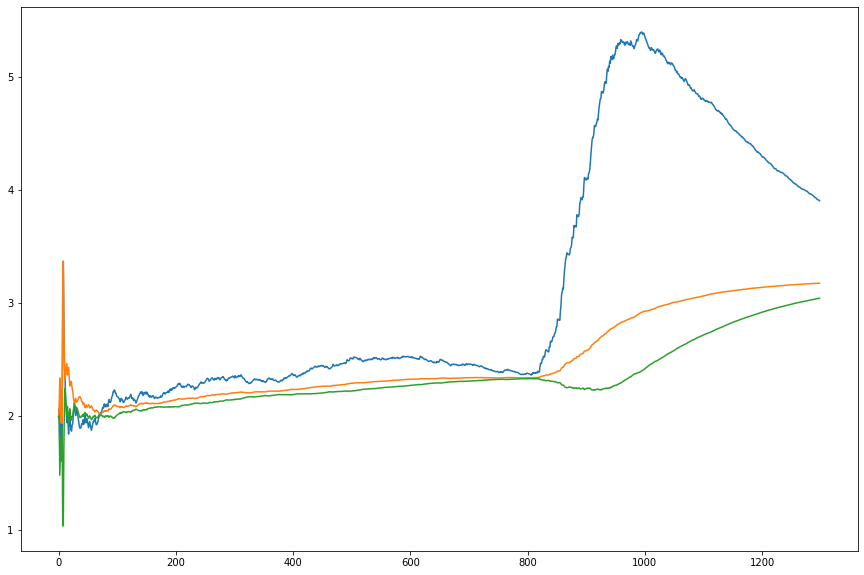

In [28]:
plt.rcParams["figure.figsize"] = (15,10)

for col in kurtosis_df:
    plt.plot(kurtosis_df[col])
    
#plt.legend(loc='upper right', fancybox=True, ncol=100, labels=['Actual', 'Predited'])    
#plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

In [29]:
a = []

for i in range(n):
    #print(dataset.loc[i][0])
    square= dataset.loc[i][0] ** 2
    a.append(square)
    #print(square)

In [30]:
a

[0.07865737279126636,
 0.16506082048843448,
 0.28808075217574286,
 0.05098885682175228,
 0.2011483500648488,
 0.1812515780843438,
 0.1271998421326141,
 0.055382996707289564,
 0.003918058260145339,
 0.10699996748067993,
 0.00384492958488956,
 0.004011829290986698,
 0.1928634662025496,
 0.27568006849287346,
 0.23261279697891665,
 0.020213342278844783,
 0.06981360112476306,
 0.011266478165650127,
 0.006346583331288622,
 0.05731862752257422,
 0.08993857582292958,
 0.2857538421570789,
 0.310800639871161,
 0.028048832429941065,
 0.05523211747098557,
 0.03624040530421544,
 0.08405579008528499,
 0.05601653266686038,
 0.06509570041108786,
 0.01632956203159669,
 0.2707901308955698,
 0.10883387155830428,
 0.1792700785220416,
 0.02696247363121436,
 0.019940689741072583,
 0.2066701758251802,
 0.29303682635936706,
 0.2123027137331687,
 0.18142701132659733,
 0.03972347370631692,
 0.14450406203262056,
 0.04448943533443701,
 0.19033382801740284,
 0.10611550992033233,
 0.24533760056105497,
 0.0711197406

In [31]:
m = len(a)
print(m)

1300


In [32]:
print(a[1])

0.16506082048843448


In [33]:
import math
vib_rms = []
square_sum = 0

for i in range(1, m+1):
    square_sum = square_sum + a[i-1]
    rms = math.sqrt(square_sum/i) 
    vib_rms.append(rms)
    print(square_sum, rms)

0.07865737279126636 0.2804592176970947
0.24371819327970085 0.3490832230856281
0.5317989454554437 0.42103006442748786
0.582787802277196 0.3817026991904812
0.7839361523420447 0.39596367316763914
0.9651877304263885 0.4010793210048748
1.0923875725590027 0.39503843801385824
1.1477705692662923 0.37877608313921635
1.1516886275264375 0.35772252243672475
1.2586885950071174 0.3547800156445001
1.2625335245920069 0.3387857360676652
1.2665453538829936 0.32487758641820175
1.4594088200855433 0.3350555430516815
1.7350888885784168 0.352043918585088
1.9677016855573335 0.3621879517191163
1.9879150278361783 0.35248360137708695
2.0577286289609416 0.34791214483992106
2.0689951071265917 0.3390341761801367
2.0753416904578805 0.33049736765078624
2.132660317980455 0.32654711130099245
2.2225988938033843 0.3253275926847674
2.508352735960463 0.3376626029822496
2.819153375831624 0.35010267908961046
2.847202208261565 0.3444320329821718
2.9024343257325507 0.34073064586165713
2.938674731036766 0.33619332413616093
3.02

In [34]:
vib_rms

[0.2804592176970947,
 0.3490832230856281,
 0.42103006442748786,
 0.3817026991904812,
 0.39596367316763914,
 0.4010793210048748,
 0.39503843801385824,
 0.37877608313921635,
 0.35772252243672475,
 0.3547800156445001,
 0.3387857360676652,
 0.32487758641820175,
 0.3350555430516815,
 0.352043918585088,
 0.3621879517191163,
 0.35248360137708695,
 0.34791214483992106,
 0.3390341761801367,
 0.33049736765078624,
 0.32654711130099245,
 0.3253275926847674,
 0.3376626029822496,
 0.35010267908961046,
 0.3444320329821718,
 0.34073064586165713,
 0.33619332413616093,
 0.33459375706037864,
 0.3315950119061391,
 0.3292542647172284,
 0.3245598206921489,
 0.33268033902207694,
 0.33259379873792133,
 0.3357066900339654,
 0.3319296909445595,
 0.3280230636743093,
 0.3321913662168648,
 0.3395416848494272,
 0.3432805848104861,
 0.34564715548960356,
 0.34275099421921557,
 0.3437112310222145,
 0.34115082751857256,
 0.34366212067096835,
 0.3432654881904365,
 0.34736820673926194,
 0.3458144117151564,
 0.34556103015

In [35]:
vib_rms = pd.DataFrame({'vib_rms': vib_rms[:]})

In [36]:
vib_rms.head()

,vib_rms
0,0.280459
1,0.349083
2,0.421030
3,0.381703
4,0.395964


In [37]:
vib_rms['days'] = np.linspace(1,1300,1300)

In [38]:
cols = list(vib_rms.columns)
cols = [cols[-1]] + cols[:-1]
vib_rms = vib_rms[cols]

vib_rms.head()

,days,vib_rms
0,1.0,0.280459
1,2.0,0.349083
2,3.0,0.421030
3,4.0,0.381703
4,5.0,0.395964


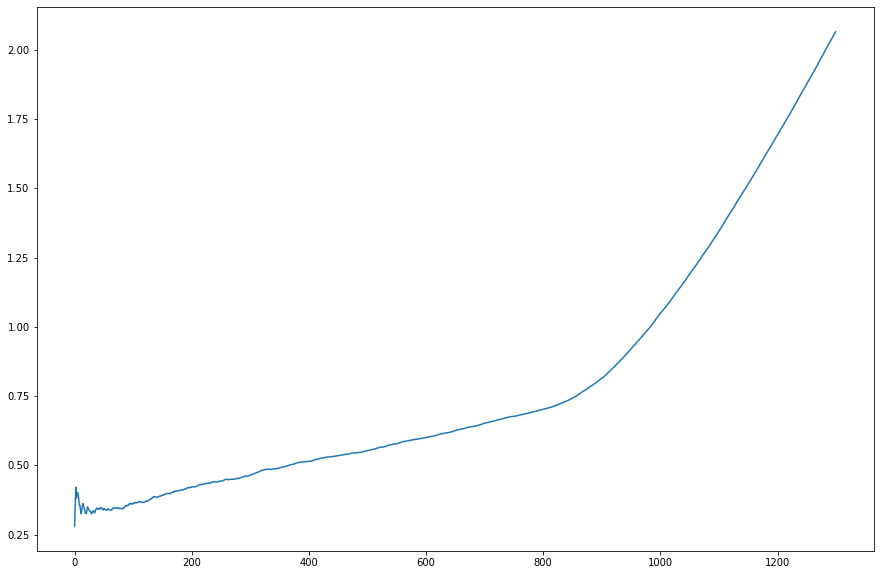

In [39]:
plt.plot(vib_rms.vib_rms)
plt.show()

In [40]:
vib_rms.index = vib_rms.index+1

In [41]:
vib_rms.head()

,days,vib_rms
1,1.0,0.280459
2,2.0,0.349083
3,3.0,0.421030
4,4.0,0.381703
5,5.0,0.395964


In [42]:
vib_fail = vib_rms["vib_rms"].max()

In [43]:
vib_rms["vib_rms"].mean()

0.795390787551076

In [44]:
vib_rms["vib_rms"].std()

0.4507678891509326

In [45]:
#vib_rms[vib_rms.vib_rms>vib_rms.vib_rms.quantile(0.50)]
vib_rms[vib_rms.vib_rms>vib_rms.vib_rms.mean()]

,days,vib_rms
890,890.0,0.796312
891,891.0,0.798488
892,892.0,0.800088
893,893.0,0.801933
894,894.0,0.803134
...,...,...
1296,1296.0,2.048952
1297,1297.0,2.053026
1298,1298.0,2.056955
1299,1299.0,2.061148


In [46]:
ft = vib_rms.vib_rms.mean() + vib_rms.vib_rms.std()
print(ft)

1.2461586767020085


In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sympy.solvers import solve
from sympy import Symbol, exp

n_rows = len(vib_rms)
RUL_trend= []
G_Truth = []

for i in range(1, n_rows):
    x = vib_rms.iloc[0:i, 0].values
    y = vib_rms.iloc[0:i, 1].values
    x = x.reshape(-1,1)
    #print(y[i-1])
    #print(x[-1,0])
    #print(x[-1,0])

    if y[i-1] >=ft: 
        poly = PolynomialFeatures(degree = 3) 
        X_poly = poly.fit_transform(x) 
        poly.fit(X_poly, y) 
        lin2 = LinearRegression() 
        lin2.fit(X_poly, y)
        z = Symbol('z', positive = True, real = True) 
        remaining = solve(lin2.intercept_ + lin2.coef_[0]*pow(z,0) + lin2.coef_[1]*pow(z,1) + lin2.coef_[2]*pow(z,2) 
                          + lin2.coef_[3]*pow(z,3)  - vib_fail , z)
        
        #remaining = solve(lin2.intercept_ + lin2.coef_[0]*pow(z,0) + lin2.coef_[1]*pow(z,1) + lin2.coef_[2]*pow(z,2) 
        #                   + lin2.coef_[3]*pow(z,3) + lin2.coef_[4]*pow(z,4)- vib_fail , z)
        #print(i)
        #print(remaining)
        #print(remaining[0])
        #print(x[-1,0])

        RUL = remaining[0] - x[-1,0]
        actual = n_rows - i
        RUL_trend.append(RUL)
        G_Truth.append(actual)

In [48]:
df_RUL = pd.DataFrame({'Actual': G_Truth[:],'RUL': RUL_trend[:]})
#df_RUL['diff'] = df_RUL.RUL - df_RUL.Actual
#df_RUL['Error(%)'] = ((df_RUL.Actual - df_RUL.RUL)/df_RUL.Actual)*100
pd.set_option('display.max_rows', df_RUL.shape[0]+1)
df_RUL

,Actual,RUL
0,230,246.989931027826
1,229,245.366906892835
2,228,243.752386919788
3,227,242.149008821108
4,226,240.558042574458
5,225,238.981017613852
6,224,237.417529871771
7,223,235.857596354330
8,222,234.303667573573
9,221,232.763292120143


In [49]:
df_RUL= df_RUL.astype(float)

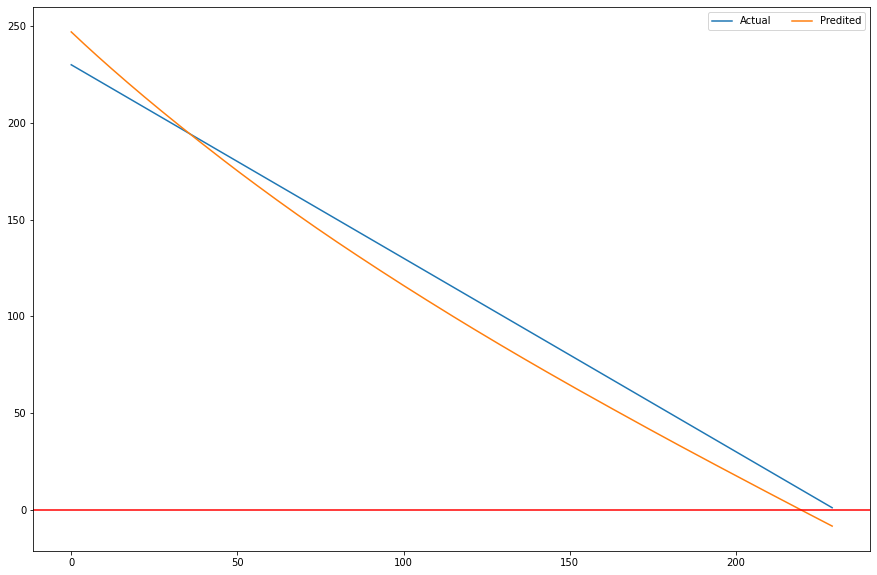

In [50]:
for col in df_RUL:
    plt.plot(df_RUL[col])
    
plt.legend(loc='upper right', fancybox=True, ncol=100, labels=['Actual', 'Predited'])    
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

In [51]:
#df_RUL = pd.DataFrame({'Actual': G_Truth[:],'RUL': RUL_trend[:]})
#df_RUL['diff'] = df_RUL.RUL - df_RUL.Actual
#df_RUL['Error(%)'] = ((df_RUL.Actual - df_RUL.RUL)/df_RUL.Actual)*100
#pd.set_option('display.max_rows', df_RUL.shape[0]+1)
#df_RUL

In [52]:
#df_RUL= df_RUL.astype(float)
#df_RUL.info()

In [53]:
#for col in df_RUL:
#    plt.plot(df_RUL[col])
    
#plt.legend(loc='upper right', fancybox=True, ncol=100, labels=['Actual', 'Predited'])    
#plt.axhline(y = 0, color = 'r', linestyle = '-')
#plt.show()